### Clustering countries into different groups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
data= pd.read_csv('Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
x = data.drop('country',axis=1)

In [9]:
scaler =MinMaxScaler()
x= scaler.fit_transform(x)

In [10]:
sse=[]
for i in range(2, len(data)):
    km=KMeans(n_clusters=i, random_state=23)
    km.fit(x)
    sse.append(km.inertia_)

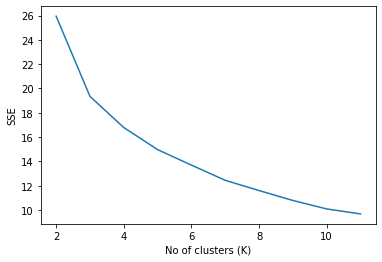

In [13]:
plt.xlabel('No of clusters (K)')
plt.ylabel('SSE')
plt.plot(range(2,12), sse[:10])

In [14]:
km= KMeans(n_clusters=5, random_state=23)
km.fit(x)

KMeans(n_clusters=5, random_state=23)

In [15]:
km.inertia_ 

14.966814843024192

In [16]:
clusters = km.fit_predict(x)
clusters

array([4, 3, 3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 3, 0,
       3, 2, 3, 4, 4, 0, 4, 2, 3, 4, 4, 3, 3, 3, 4, 4, 0, 3, 4, 3, 2, 3,
       2, 3, 3, 0, 3, 4, 0, 3, 0, 2, 2, 0, 4, 3, 2, 0, 2, 3, 0, 4, 4, 0,
       4, 3, 2, 0, 0, 3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 0, 2, 0, 0, 3, 3, 4,
       4, 3, 3, 1, 3, 0, 4, 3, 3, 4, 1, 4, 3, 0, 3, 0, 3, 3, 4, 0, 0, 0,
       2, 2, 4, 4, 2, 3, 0, 3, 3, 3, 0, 3, 2, 2, 3, 3, 0, 0, 3, 4, 3, 3,
       4, 1, 3, 2, 0, 0, 3, 2, 3, 3, 4, 3, 2, 2, 0, 4, 3, 4, 4, 0, 3, 3,
       0, 4, 3, 2, 2, 2, 3, 0, 0, 3, 3, 0, 4])

In [17]:
km.cluster_centers_

array([[0.22111108, 0.16543422, 0.23549964, 0.25573954, 0.03871989,
        0.12723758, 0.6586705 , 0.36409754, 0.02141133],
       [0.00746511, 0.87993456, 0.30971618, 0.9003454 , 0.5098788 ,
        0.06171334, 0.97304405, 0.0362776 , 0.54725794],
       [0.01160058, 0.22809655, 0.46214183, 0.22679793, 0.36299305,
        0.06411416, 0.95239067, 0.1048624 , 0.41839206],
       [0.06280428, 0.21930937, 0.29310507, 0.27691179, 0.12289645,
        0.10249025, 0.84080449, 0.13581398, 0.08110108],
       [0.50988924, 0.13761125, 0.2989046 , 0.24815275, 0.01873754,
        0.15594821, 0.50832101, 0.6804515 , 0.01176248]])

In [18]:
data_cluster = data.copy()


In [19]:
data_cluster['Clusters']= clusters

In [20]:
data_cluster

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [22]:
data_cluster[data_cluster.Clusters==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.78,71.6,3.20,1980,0
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.92,57.1,2.88,6350,0
27,Cambodia,44.4,54.100,5.68,59.5000,2520,3.12,66.1,2.88,786,0
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740,0
47,Egypt,29.1,21.300,4.66,26.6000,9860,10.10,70.5,3.19,2600,0
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482,0
52,Fiji,24.1,57.800,4.86,63.9000,7350,4.23,65.3,2.67,3650,0
55,Gabon,63.7,57.700,3.50,18.9000,15400,16.60,62.9,4.08,8750,0
59,Ghana,74.7,29.500,5.22,45.9000,3060,16.60,62.2,4.27,1310,0


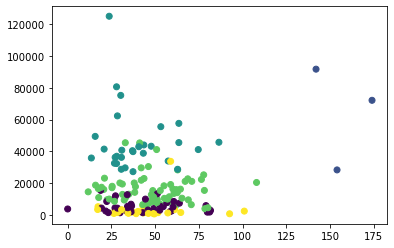

In [21]:
plt.scatter(data.imports, data.income, c= clusters)

In [1]:
# k value koreennene sse value reduce avm